In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [8]:
data = loadmat('ex3data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [9]:
weights = loadmat('ex3weights.mat')
weights.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [10]:
y = data['y']
# Add constant for intercept
X = np.c_[np.ones((data['X'].shape[0], 1)), data['X']]
print('X: {} (with intercept)'.format(X.shape))
print('y: {}'.format(y.shape))

X: (5000, 401) (with intercept)
y: (5000, 1)


In [11]:
theta1, theta2 = weights['Theta1'], weights['Theta2']
print('theta1: {}'.format(theta1.shape))
print('theta2: {}'.format(theta2.shape))

theta1: (25, 401)
theta2: (10, 26)


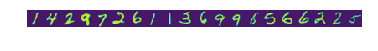

In [12]:
sample = np.random.choice(X.shape[0], 20)
plt.imshow(X[sample,1:].reshape(-1,20).T)
plt.axis('off');

In [13]:
def sigmoid(z):
    return(1/(1 + np.exp(-z)))

In [14]:
def lrcostFunctionReg(theta, reg, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1*(1/m)*(np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [15]:
def lrgradientReg(theta, reg, X, y):
    #here reg is synonymous to lambda in the regularised formula
    m = y.size
   # print(theta.shape())
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    #print(theta.shape())
    grad = (1/m)*X.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [16]:
from scipy.optimize import minimize

def oneVsAll(features, classes, n_labels, reg):
    initial_theta = np.zeros((X.shape[1], 1)) # 401*1
    all_theta = np.zeros((n_labels, X.shape[1])) #10*401
    
    for c in np.arange(1, n_labels+1):
        res = minimize(lrcostFunctionReg, initial_theta, args=(reg, features, (classes == c)*1), method=None,
                       jac=lrgradientReg, options={'maxiter':50})
        all_theta[c-1] = res.x
    return(all_theta)

In [17]:
theta = oneVsAll(X, y, 10, 0.1)

TypeError: 'tuple' object is not callable